In [2]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치
import seaborn as sns              #시각화를 위한 설치
import plotly.express as px        #시각화를 위한 설치

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [3]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

### 2019년 지하철 승차 인원 합계 데이터 불러오기

In [115]:
subway= pd.read_csv('subway.csv')

In [116]:
subway.head(2)

,날짜,호선,역번호,역명,구분,합 계
0,2019-01-01,1호선,150.0,서울역,승차,39559.0
1,2019-01-01,1호선,150.0,서울역,하차,31279.0


### 가산디지털역만 따로 빼오기

In [117]:
subway_sub=subway.loc[subway['역명']=='가산디지털단지']

In [118]:
subway_sub.head(3)

,날짜,호선,역번호,역명,구분,합 계
488,2019-01-01,7호선,2748.0,가산디지털단지,승차,12102.0
489,2019-01-02,7호선,2748.0,가산디지털단지,승차,50647.0
1038,2019-01-03,7호선,2748.0,가산디지털단지,승차,51232.0


### 날짜와 합계만 따로 빼서 예측

In [119]:
subway_sub=subway_sub.loc[:,['날짜','합 계']]

In [120]:
subway_sub

,날짜,합 계
488,2019-01-01,12102.0
489,2019-01-02,50647.0
1038,2019-01-03,51232.0
1039,2019-01-04,52754.0
1588,2019-01-05,18974.0
1589,2019-01-06,13724.0
2138,2019-01-07,52282.0
2139,2019-01-08,52073.0
2688,2019-01-09,51598.0
2689,2019-01-10,51615.0


In [121]:
subway_sub.columns=['day','sum']

In [122]:
subway_sub=subway_sub[(subway_sub['day']>='2019-12-01')&(subway_sub['day']<='2019-12-31')] 

In [123]:
subway_sub

,day,sum
92338,2019-12-01,14689.0
92339,2019-12-02,51348.0
92888,2019-12-03,51517.0
92889,2019-12-04,50928.0
93438,2019-12-05,51053.0
93439,2019-12-06,51799.0
93988,2019-12-07,20226.0
93989,2019-12-08,15956.0
94538,2019-12-09,50590.0
94539,2019-12-10,51528.0


In [124]:
subway_sub['day']=subway_sub['day'].astype(str)

In [125]:
subway_sub['day']=pd.to_datetime(subway_sub['day'])

In [126]:
subway_sub.index=subway_sub['day']
subway_sub.set_index('day',inplace=True)

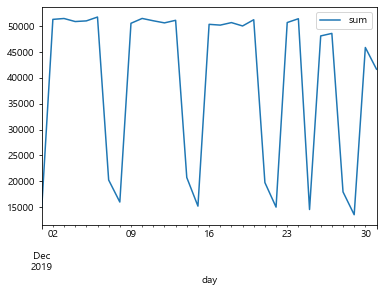

In [127]:
subway_sub.plot()
plt.show()

In [128]:
subway_sub

,sum
day,
2019-12-01,14689.0
2019-12-02,51348.0
2019-12-03,51517.0
2019-12-04,50928.0
2019-12-05,51053.0
2019-12-06,51799.0
2019-12-07,20226.0
2019-12-08,15956.0
2019-12-09,50590.0


### 시계열 데이터에는 결측지가 존재하면 안되기 때문에 결측치를 먼저 제거

In [129]:
subway_sub.isnull().sum()

sum    0
dtype: int64

In [130]:
subway_sub.info()
#1년 365일의 데이터

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-12-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [131]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [132]:
subway_sub['sum']

day
2019-12-01    14689.0
2019-12-02    51348.0
2019-12-03    51517.0
2019-12-04    50928.0
2019-12-05    51053.0
2019-12-06    51799.0
2019-12-07    20226.0
2019-12-08    15956.0
2019-12-09    50590.0
2019-12-10    51528.0
2019-12-11    51076.0
2019-12-12    50669.0
2019-12-13    51166.0
2019-12-14    20708.0
2019-12-15    15164.0
2019-12-16    50387.0
2019-12-17    50235.0
2019-12-18    50723.0
2019-12-19    50071.0
2019-12-20    51280.0
2019-12-21    19728.0
2019-12-22    14971.0
2019-12-23    50735.0
2019-12-24    51472.0
2019-12-25    14506.0
2019-12-26    48140.0
2019-12-27    48629.0
2019-12-28    17922.0
2019-12-29    13498.0
2019-12-30    45899.0
2019-12-31    41694.0
Name: sum, dtype: float64

In [143]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=0, ma=2)파라미터로 arima모델을 학습
model=ARIMA(subway_sub_h['sum'], order=(0,2,4))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.sum   No. Observations:                   24
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -267.726
Method:                       css-mle   S.D. of innovations          12512.234
Date:                Fri, 15 Oct 2021   AIC                            547.452
Time:                        10:23:14   BIC                            554.520
Sample:                    12-03-2019   HQIC                           549.327
                         - 12-26-2019                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -35.7251     43.416     -0.823      0.411    -120.818      49.368
ma.L1.D2.sum    -2.0790      0.270     -7.693      0.000      -2.609      -1.549
ma.L2.D2.sum     0.4198      0.462      0.90

<AxesSubplot:xlabel='day'>

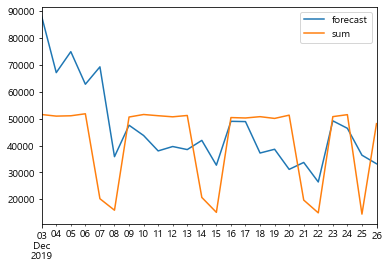

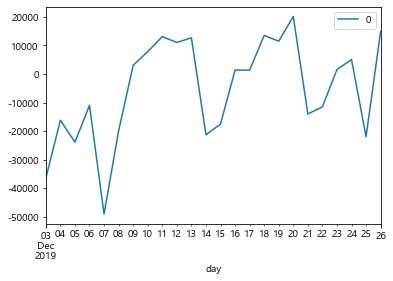

In [144]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [135]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [136]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(subway_sub['sum'], order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 691.1822751246251
(0, 0, 1) 689.2577348027805
(0, 0, 2) 686.7212683234823
(0, 0, 3) 685.4545889257756
(0, 0, 4) 687.0760221797908
(0, 1, 0) 684.722443729883
(0, 1, 1) 674.7119014037505
(0, 1, 2) 672.609483679973
(0, 1, 3) 668.8666215242758
(0, 1, 4) 667.4811657467837
(0, 2, 0) 684.919283380224
(0, 2, 1) 668.2939846181035
(0, 2, 2) 662.1390789146814
(0, 2, 3) 658.8598249669951
(0, 2, 4) 654.2867149466161
(1, 0, 0) 692.5187654247862
(1, 0, 1) 690.0876852742937
(1, 0, 2) 687.0419600142725
(1, 1, 0) 686.2654120604125
(1, 1, 1) 676.075258549685
(1, 2, 0) 684.4357925396122
(1, 2, 1) 670.0722808391758
(2, 0, 0) 687.223767533917
(2, 0, 1) 687.7361483775194
(2, 0, 2) 688.6153648483371
(2, 0, 3) 688.2057052056576
(2, 1, 0) 675.3730566820709
(2, 1, 1) 670.068123409399
(2, 1, 2) 671.9605991509864
(2, 1, 3) 668.0105104003387
(2, 2, 0) 667.1159513551496
(2, 2, 1) 660.3676467325006
(3, 0, 0) 688.5989907322403
(3, 0, 1) 689.6869179270655
(3, 1, 0) 677.3260745096659
(3, 1, 1) 671.705610165279

In [140]:
subway_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2019-12-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [141]:
subway_sub_h=subway_sub.head(26)

In [142]:
subway_sub_t=subway_sub.tail(5)

In [145]:
forecast_data=model_fit.forecast(steps=5) #학습데이터 셋으로 부터 5일 뒤를 예측

pred_y=forecast_data[0].tolist()
test_y=subway_sub_t.values #실제 5일의 미세먼지 데이터

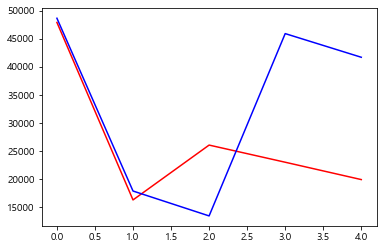

In [146]:
plt.plot(pred_y,color='red')
plt.plot(test_y,color='blue')

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

15209.625767758369
